# Import Packages and Load Data

In [398]:
# importing packages
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.lines as mlines
from tabulate import tabulate

In [399]:
# options below set some options for pandas and to have matplotlib show the charts in the notebook
# this code is adapted from HW_10_11

pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [400]:
# defining date parser to pass to read_csv
def parse_date(date):
    if pd.isnull(date):
        pass
    else:
        return datetime.strptime(str(date), '%m/%d/%Y %I:%M:%S %p')

In [401]:
# importing datasets 
crime_df = pd.read_csv('../../datasets/crime.csv', index_col = False, parse_dates = ['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE'], date_parser = parse_date, encoding='windows-1252')
weather_df = pd.read_csv('../../datasets/denver_weather_2017_2022.csv')

/tmp/ipykernel_147633/670293891.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  crime_df = pd.read_csv('../../datasets/crime.csv', index_col = False, parse_dates = ['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE'], date_parser = parse_date, encoding='windows-1252')


# Data Cleaning

## Data Set Info Inspection with Data Decisions

### crime_df

In [402]:
# visual check of dataframe
crime_df.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
0,2017421909,2017421909299900,2999,0,criminal-mischief-other,public-disorder,2017-06-25 20:40:00,NaT,2017-06-27 19:01:00,2920 W 32ND AVE,"3,133,773.00","1,702,660.00",-105.02,39.76,1,113,highland,1,0,1
1,2017342682,2017342682299900,2999,0,criminal-mischief-other,public-disorder,2017-05-26 19:00:00,NaT,2017-05-26 23:04:00,13400 E ALBROOK DR,"3,185,904.00","1,709,037.00",-104.84,39.78,5,521,montbello,1,0,1
2,2017421829,2017421829299900,2999,0,criminal-mischief-other,public-disorder,2017-06-27 16:40:00,NaT,2017-06-27 17:50:00,1600 BLOCK 16TH ST,"3,140,436.00","1,699,005.00",-105.00,39.75,6,612,union-station,1,0,1
3,2017342681,2017342681299900,2999,0,criminal-mischief-other,public-disorder,2017-05-26 19:01:00,NaT,2017-05-26 22:21:00,2200 BLOCK MARKET ST,"3,143,338.00","1,700,561.00",-104.99,39.76,6,612,five-points,1,0,1
4,2017448789,2017448789299900,2999,0,criminal-mischief-other,public-disorder,2017-07-07 21:48:00,NaT,2017-07-07 21:48:00,1733 N GROVE ST,"3,132,994.00","1,696,487.00",-105.03,39.74,1,121,west-colfax,1,0,1


In [403]:
# dimension check of crime dataframe
crime_df.shape

(399572, 20)

From the visual and dimension checks, crime_df appears to have been loaded correctly

In [404]:
# quick glance at null values
# relevant to bullet 2 in assumptions and data decisions
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399572 entries, 0 to 399571
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             399572 non-null  int64         
 1   offense_id              399572 non-null  int64         
 2   OFFENSE_CODE            399572 non-null  int64         
 3   OFFENSE_CODE_EXTENSION  399572 non-null  int64         
 4   OFFENSE_TYPE_ID         399572 non-null  object        
 5   OFFENSE_CATEGORY_ID     399572 non-null  object        
 6   FIRST_OCCURRENCE_DATE   399572 non-null  datetime64[ns]
 7   LAST_OCCURRENCE_DATE    205232 non-null  datetime64[ns]
 8   REPORTED_DATE           399572 non-null  datetime64[ns]
 9   INCIDENT_ADDRESS        394012 non-null  object        
 10  GEO_X                   394012 non-null  float64       
 11  GEO_Y                   394012 non-null  float64       
 12  GEO_LON                 394012

In [405]:
# check for singular column values
# if all values are the same, drop the column
# relevant to bullet 5 in assumptions and data decisions
print(f'is_crime value count: {crime_df.IS_CRIME.value_counts()}\n')
print(f'is_traffic value counts: {crime_df.IS_TRAFFIC.value_counts()}')

is_crime value count: IS_CRIME
1    399572
Name: count, dtype: int64

is_traffic value counts: IS_TRAFFIC
0    399572
Name: count, dtype: int64


In [406]:
# examining incident_id column
crime_df.incident_id.value_counts().sort_values(ascending = False)

incident_id
2020498096    7
2020613268    6
2020266427    6
2019371467    6
2017366051    6
             ..
202123034     1
201825794     1
2021609804    1
2018588567    1
2022510146    1
Name: count, Length: 370184, dtype: int64

In [407]:
# confirming suspicion that incident_id duplicates result from crime incidents with multiple offenses
crime_df[crime_df.incident_id == crime_df.incident_id.value_counts().sort_values(ascending = False).index[0]]

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
73274,2020498096,2020498096299900,2999,0,criminal-mischief-other,public-disorder,2020-08-17 12:15:00,NaT,2020-08-17 13:21:00,1331 N SPEER BLVD,"3,141,192.00","1,693,918.00",-105.00,39.74,1,123,lincoln-park,1,0,1
122358,2020498096,2020498096489900,4899,0,police-interference,all-other-crimes,2020-08-17 12:15:00,NaT,2020-08-17 13:21:00,1331 N SPEER BLVD,"3,141,192.00","1,693,918.00",-105.00,39.74,1,123,lincoln-park,1,0,1
141737,2020498096,2020498096531200,5312,0,disturbing-the-peace,public-disorder,2020-08-17 12:15:00,NaT,2020-08-17 13:21:00,1331 N SPEER BLVD,"3,141,192.00","1,693,918.00",-105.00,39.74,1,123,lincoln-park,1,0,1
148530,2020498096,2020498096570700,5707,0,criminal-trespassing,all-other-crimes,2020-08-17 12:15:00,NaT,2020-08-17 13:21:00,1331 N SPEER BLVD,"3,141,192.00","1,693,918.00",-105.00,39.74,1,123,lincoln-park,1,0,1
180424,2020498096,2020498096131300,1313,0,assault-simple,other-crimes-against-persons,2020-08-17 12:15:00,NaT,2020-08-17 13:21:00,1331 N SPEER BLVD,"3,141,192.00","1,693,918.00",-105.00,39.74,1,123,lincoln-park,1,0,1
209845,2020498096,2020498096131600,1316,0,threats-to-injure,public-disorder,2020-08-17 12:15:00,NaT,2020-08-17 13:21:00,1331 N SPEER BLVD,"3,141,192.00","1,693,918.00",-105.00,39.74,1,123,lincoln-park,1,0,1
240812,2020498096,2020498096230300,2303,0,theft-shoplift,larceny,2020-08-17 12:15:00,NaT,2020-08-17 13:21:00,1331 N SPEER BLVD,"3,141,192.00","1,693,918.00",-105.00,39.74,1,123,lincoln-park,1,0,1


In [408]:
# check for redundant columns
# relevant to bullet 7 of assumptions and data decisions
crime_df.groupby([crime_df.OFFENSE_CODE, crime_df.OFFENSE_CODE_EXTENSION, crime_df.OFFENSE_TYPE_ID]).count().head()

,,,incident_id,offense_id,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,,,,,,,,,,,,,,,,,
902,0,homicide-family,36,36,36,36,13,36,36,36,36,36,36,36,36,36,36,36,36
907,0,homicide-police-by-gun,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4
910,0,homicide-negligent,4,4,4,4,1,4,4,4,4,4,4,4,4,4,4,4,4
912,0,homicide-other,372,372,372,372,94,372,372,372,372,372,372,372,372,367,372,372,372
1005,0,kidnap-juvenile-victim,87,87,87,87,28,87,87,87,87,87,87,86,87,86,87,87,87


In [409]:
# inspect location columns
# relevant to bullet 8
crime_df.groupby([crime_df.DISTRICT_ID, crime_df.PRECINCT_ID, crime_df.NEIGHBORHOOD_ID]).count().head(10)

incident_id  offense_id  \
DISTRICT_ID PRECINCT_ID NEIGHBORHOOD_ID                            
1           111         berkeley                3475        3475   
                        chaffee-park            1627        1627   
                        highland                  43          43   
                        marston                    2           2   
                        regis                   1954        1954   
                        sunnyside               2735        2735   
                        west-highland             41          41   
            112         chaffee-park             300         300   
                        elyria-swansea            46          46   
                        globeville              4547        4547   

                                         OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
DISTRICT_ID PRECINCT_ID NEIGHBORHOOD_ID                                         
1           111         berkeley                 3475                    3475   
                        chaffee-park             1627                    1627   
                        highland                   43                      43   
                        marston                     2                       2   
                        regis                    1954                    1954   
                        sunnyside                2735                    2735   
                        west-highland              41                      41   
            112         chaffee-park              300                     300   
                        elyria-swansea             46                      46   
                        globeville               4547                    4547   

                                         OFFENSE_TYPE_ID  OFFENSE_CATEGORY_ID  \
DISTRICT_ID PRECINCT_ID NEIGHBORHOOD_ID                                         
1           111         berkeley                    3475                 3475   
                        chaffee-park                1627                 1627   
                        highland                      43                   43   
                        marston                        2                    2   
                        regis                       1954                 1954   
                        sunnyside                   2735                 2735   
                        west-highland                 41                   41   
            112         chaffee-park                 300                  300   
                        elyria-swansea                46                   46   
                        globeville                  4547                 4547   

                                         FIRST_OCCURRENCE_DATE  \
DISTRICT_ID PRECINCT_ID NEIGHBORHOOD_ID                          
1           111         berkeley                          3475   
                        chaffee-park                      1627   
                        highland                            43   
                        marston                              2   
                        regis                             1954   
                        sunnyside                         2735   
                        west-highland                       41   
            112         chaffee-park                       300   
                        elyria-swansea                      46   
                        globeville                        4547   

                                         LAST_OCCURRENCE_DATE  REPORTED_DATE  \
DISTRICT_ID PRECINCT_ID NEIGHBORHOOD_ID                                        
1           111         berkeley                         2168           3475   
                        chaffee-park                      846           1627   
                        highland                           10             43   
                        marston                             0              2   
     

**Assumptions and Data Decisions:** 
1. Removing some geographic location columns (incident_address, geo_x, geo_y, geo_lon, geo_lat) because they do not provide any meaningful information for our primary question. Additionally, they are all unique values which we cannot group together for analysis.
2. Removing the last_occurrence_date because only 51.3% (205232/399572) of the data is present.
3. Removing reported_date and retaining first_occurrence_date because we are concerned about when they occurred rather than when they are reported. Also reported dates may have descripencies as indiviudals can choose to report it a few days or even months after the event occurs. 
4. Need to make all the columns lowercase, replace spaces with underscores, and remove any periods. 
5. Removing columns is_crime and is_traffic as all the events in the dataset are crimes rather than traffic.
6. Changing the datatype of offense_id, district_id, and precinct_id to a dtype of a string.
7. offense_type_id and offense_category_id are the same as offense_code and offense_code_extension combined but put into word form. If we want extract the offense_code and the offense_code_extension, we can still obtain it from the offense_id. Therefore, we decided to drop offense_code and offense_code_extension.
8. district_id, precinct_id, and neighborhood_id are location identifiers. We decided to remove these columns as we are not interested in the location of the crime so long as the crime occurred in the city of Denver
9. first_occurrence_date will be parsed to only contain the month, day, and year.

### weather_df

In [410]:
# visual check of dataset
weather_df.head()

,Date,Max Temp,Min Temp,Avg,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,1/1/2017,47,16,31.50,0.50,33,0,0,0,0
1,1/2/2017,52,15,33.50,2.40,31,0,T,T,T
2,1/3/2017,32,10,21.00,-10.20,44,0,T,T,T
3,1/4/2017,12,4,8.00,-23.30,57,0,0.1,1.5,T
4,1/5/2017,5,-2,1.50,-29.90,63,0,0.24,2.6,4


In [411]:
# dimensions of weather dataset
weather_df.shape

(2191, 10)

From the visual and dimension checks, weather_df appears to have been loaded correctly

In [412]:
# check nulls and datatypes
# relevant to point 1
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2191 non-null   object 
 1   Max Temp       2191 non-null   int64  
 2   Min Temp       2191 non-null   int64  
 3   Avg            2191 non-null   float64
 4   Departure      2191 non-null   float64
 5   HDD            2191 non-null   int64  
 6   CDD            2191 non-null   int64  
 7   Precipitation  2191 non-null   object 
 8   New Snow       2191 non-null   object 
 9   Snow Depth     2191 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 171.3+ KB


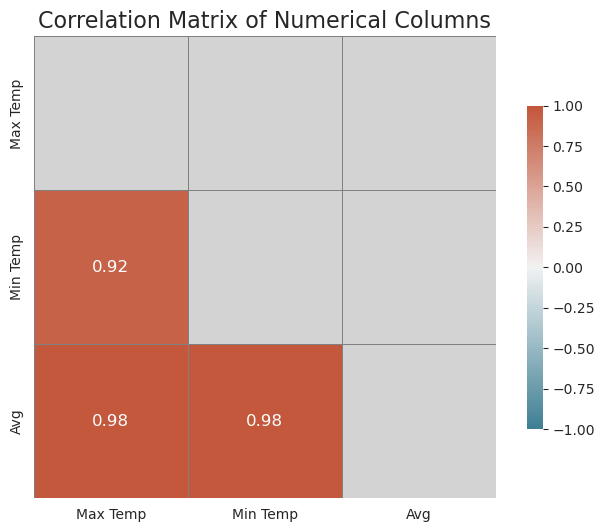

In [413]:
# check correlation between max, min, and avg temp
# relevant to point 2
corr_matrix = weather_df[['Max Temp','Min Temp','Avg']].corr()

# begin plotting
plt.figure(figsize=(8, 6))

# set mask color to gray
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap.set_bad('lightgray')

# plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=cmap, center=0, mask=mask,
            annot_kws={'size': 12}, cbar_kws={'shrink': 0.7}, square=True,
            vmin=-1, vmax=1, linewidths=0.5, linecolor='gray', cbar=True)

plt.title("Correlation Matrix of Numerical Columns", fontsize=16)
plt.show()
pass

**Assumptions and Data Decisions:**
1. Need to change the date format to match the date format of the crime_df. The decided format is yyyy-mm-dd.
2. Avg temperature is highly correlated with Max and Min temp. So, dropping Max and Min, and keeping Avg
3. This study is focused on air temperature. So, dropping Departure, HDD, CDD, Precipitation, New Snow, and Snow Depth
4. Stripping all spaces to be underscore and any white space.

### Overall

**Assumptions and Data Decisions:**
* Need to merge the two dataframes on date
* Should create month and year columns for time aggregations
* Should create severity column based on offense_type_id

## Data Cleaning Steps

### crime_df

In [414]:
# turning the columns into lower_case
crime_df_cleaned = crime_df.copy()
crime_df_cleaned.columns = crime_df.columns.str.lower()

In [415]:
# dropping unneeded columns
crime_df_cleaned.drop(['incident_address', 'geo_x', 'geo_y', 'geo_lon', 'geo_lat', 
                     'last_occurrence_date', 'reported_date', 'is_crime', 'is_traffic', 
                     'offense_code', 'offense_code_extension','district_id','precinct_id',
                     'neighborhood_id'],
                     axis = 1, inplace = True)

In [416]:
# changing the datatype for incident_id and offense_id
for col in ['incident_id','offense_id']:
    crime_df_cleaned[col] = crime_df_cleaned[col].astype('str')

In [417]:
# creating a new date column that matches the date format of the weather.csv
crime_df_cleaned['date'] = crime_df_cleaned['first_occurrence_date'].astype(str)
crime_df_cleaned['date'] = pd.to_datetime(crime_df_cleaned['date'].str.split(' ').str[0])

In [418]:
# dropping the column first_occurrence_date because another column replaced it
crime_df_cleaned = crime_df_cleaned.drop('first_occurrence_date', axis = 1)

In [419]:
# visual check of the crime_df_cleaned dataframe prior to merge
crime_df_cleaned.head()

,incident_id,offense_id,offense_type_id,offense_category_id,victim_count,date
0,2017421909,2017421909299900,criminal-mischief-other,public-disorder,1,2017-06-25
1,2017342682,2017342682299900,criminal-mischief-other,public-disorder,1,2017-05-26
2,2017421829,2017421829299900,criminal-mischief-other,public-disorder,1,2017-06-27
3,2017342681,2017342681299900,criminal-mischief-other,public-disorder,1,2017-05-26
4,2017448789,2017448789299900,criminal-mischief-other,public-disorder,1,2017-07-07


### weather_df

In [420]:
# fixing the column titles of weather_df to not include spaces
weather_df_cleaned = weather_df.copy()
weather_df_cleaned.columns = weather_df_cleaned.columns.str.replace(' ', '')
weather_df_cleaned.columns = weather_df_cleaned.columns.str.lower()
weather_df_cleaned.rename(columns={'avg':'avgtemp', 'date':'weather_date'}, inplace=True)

In [421]:
# dropping unneeded columns
weather_df_cleaned.drop(['maxtemp','mintemp','departure', 'hdd', 'cdd','precipitation',
                         'newsnow','snowdepth'], axis = 1, inplace = True)

In [422]:
# change weather_date datatype to datetime
weather_df_cleaned.weather_date = pd.to_datetime(weather_df_cleaned.weather_date)

In [423]:
# visual check of weather_df_cleaned before merge
weather_df_cleaned.head()

,weather_date,avgtemp
0,2017-01-01,31.50
1,2017-01-02,33.50
2,2017-01-03,21.00
3,2017-01-04,8.00
4,2017-01-05,1.50


## Merge Dataframes

In [424]:
# merge cleaned dataframes
crime_weather_df = crime_df_cleaned.merge(
    weather_df_cleaned,
    left_on = 'date',
    right_on = 'weather_date'
    ).drop('weather_date', axis = 1)

In [425]:
# visual check of merged dataset
crime_weather_df.head(10)

,incident_id,offense_id,offense_type_id,offense_category_id,victim_count,date,avgtemp
0,2017421909,2017421909299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50
1,2017415334,2017415334299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50
2,2017415812,2017415812299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50
3,2017417009,2017417009299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50
4,2017417208,2017417208299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50
5,2017415066,2017415066299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50
6,2017420843,2017420843299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50
7,20176005793,20176005793299901,criminal-mischief-mtr-veh,public-disorder,1,2017-06-25,61.50
8,2017415263,2017415263299901,criminal-mischief-mtr-veh,public-disorder,1,2017-06-25,61.50
9,2017421164,2017421164299901,criminal-mischief-mtr-veh,public-disorder,1,2017-06-25,61.50


In [426]:
# common sense dimension check of merged dataset
crime_weather_df.shape

(399572, 7)

From the visual and dimensional checks, the merge appears to have been successful

# Feature Engineering

During data cleaning, we determined that we needed to add two columns to our final dataset:
1. Month and year columns based on the date in the merged dataset
2. Severity column based on offense_type_id column

### Month and Year columns

In [427]:
# Month and year columns
crime_weather_df['month'] = crime_weather_df['date'].dt.month
crime_weather_df['year'] = crime_weather_df['date'].dt.year

### Severity by harm column

In [428]:
crime_weather_df['offense_type_id'].unique()

array(['criminal-mischief-other', 'criminal-mischief-mtr-veh',
       'drug-methampetamine-sell', 'drug-methampetamine-possess',
       'liquor-possession', 'police-interference',
       'violation-of-restraining-order', 'public-fighting',
       'disturbing-the-peace', 'curfew', 'criminal-trespassing',
       'property-crimes-other', 'fireworks-possession',
       'public-order-crimes-other', 'sex-aslt-non-rape', 'robbery-street',
       'robbery-purse-snatch-w-force', 'assault-simple', 'assault-dv',
       'aggravated-assault', 'aggravated-assault-dv',
       'menacing-felony-w-weap', 'threats-to-injure',
       'burglary-residence-by-force', 'burglary-business-by-force',
       'burglary-residence-no-force', 'burg-auto-theft-resd-no-force',
       'theft-shoplift', 'theft-parts-from-vehicle',
       'theft-items-from-vehicle', 'burglary-vending-machine',
       'theft-from-bldg', 'theft-other', 'theft-bicycle',
       'theft-of-motor-vehicle', 'forgery-poss-of-forged-inst',
       '

In [429]:
# We have defined crime severity in terms of harm to humans
harm_severity = {    
    # High Harm to Humans
    'agg-aslt-police-weapon': 'High Harm',
    'agg-aslt-shoot': 'High Harm',
    'aggravated-assault': 'High Harm',
    'aggravated-assault-dv': 'High Harm',
    'aslt-agg-police-gun': 'High Harm',
    'assault-dv': 'High Harm',
    'assault-police-simple': 'High Harm',
    'assault-simple': 'High Harm',
    'bomb-threat': 'High Harm',
    'burg-auto-theft-busn-w-force': 'High Harm',
    'burg-auto-theft-resd-w-force': 'High Harm',
    'burglary-business-by-force': 'High Harm',
    'burglary-residence-by-force': 'High Harm',
    'explosive-incendiary-dev-pos': 'High Harm',
    'explosive-incendiary-dev-use': 'High Harm',
    'explosives-posses': 'High Harm',
    'harassment-sexual-in-nature': 'High Harm',
    'homicide-family': 'High Harm',
    'homicide-negligent': 'High Harm',
    'homicide-other': 'High Harm',
    'homicide-police-by-gun': 'High Harm',
    'kidnap-adult-victim': 'High Harm',
    'kidnap-dv': 'High Harm',
    'kidnap-juvenile-victim': 'High Harm',
    'kidnap-parental': 'High Harm',
    'menacing-felony-w-weap': 'High Harm',
    'public-fighting': 'High Harm',
    'riot': 'High Harm',
    'riot-incite': 'High Harm',
    'robbery-bank': 'High Harm',
    'robbery-business': 'High Harm',
    'robbery-car-jacking': 'High Harm',
    'robbery-purse-snatch-w-force': 'High Harm',
    'robbery-residence': 'High Harm',
    'robbery-street': 'High Harm',
    'sex-aslt-fondle-adult-victim': 'High Harm',
    'sex-aslt-non-rape': 'High Harm',
    'sex-aslt-non-rape-pot': 'High Harm',
    'sex-aslt-rape': 'High Harm',
    'sex-aslt-rape-pot': 'High Harm',
    'sex-aslt-statutory-rape': 'High Harm',
    'sex-aslt-statutory-rape-pot': 'High Harm',
    'sex-aslt-w-object': 'High Harm',
    'sex-aslt-w-object-pot': 'High Harm',
    'sex-asslt-sodomy-man-strng-arm': 'High Harm',
    'sex-off-fail-to-register': 'High Harm',
    'sex-off-registration-viol': 'High Harm',
    'weapon-fire-into-occ-bldg': 'High Harm',
    'weapon-fire-into-occ-veh': 'High Harm',
    'weapon-other-viol': 'High Harm',
    'weapon-poss-illegal-dangerous': 'High Harm',
    'weapon-unlawful-discharge-of': 'High Harm',
    'weapon-unlawful-sale': 'High Harm',
    
    # Medium Harm to Humans
    'animal-cruelty-to': 'Medium Harm',
    'animal-poss-of-dangerous': 'Medium Harm',
    'arson-business': 'Medium Harm',
    'arson-other': 'Medium Harm',
    'arson-public-building': 'Medium Harm',
    'arson-residence': 'Medium Harm',
    'arson-vehicle': 'Medium Harm',
    'bigamy': 'Medium Harm',
    'burg-auto-theft-busn-no-force': 'Medium Harm',
    'burg-auto-theft-resd-no-force': 'Medium Harm',
    'burglary-business-no-force': 'Medium Harm',
    'burglary-residence-no-force': 'Medium Harm',
    'disarming-a-peace-officer': 'Medium Harm',
    'escape': 'Medium Harm',
    'escape-aiding': 'Medium Harm',
    'extortion': 'Medium Harm',
    'failure-to-report-abuse': 'Medium Harm',
    'fraud-by-telephone': 'Medium Harm',
    'fraud-by-use-of-computer': 'Medium Harm',
    'fraud-criminal-impersonation': 'Medium Harm',
    'fraud-identity-theft': 'Medium Harm',
    'fraud-nsf-closed-account': 'Medium Harm',
    'harassment': 'Medium Harm',
    'harassment-dv': 'Medium Harm',
    'harassment-stalking-dv': 'Medium Harm',
    'homicide-conspiracy': 'Medium Harm',
    'money-laundering': 'Medium Harm',
    'obstructing-govt-operation': 'Medium Harm',
    'other-enviornment-animal-viol': 'Medium Harm',
    'outside-steal-recovered-veh': 'Medium Harm',
    'parole-violation': 'Medium Harm',
    'police-disobey-lawful-order': 'Medium Harm',
    'police-false-information': 'Medium Harm',
    'police-interference': 'Medium Harm',
    'police-making-a-false-rpt': 'Medium Harm',
    'police-obstruct-investigation': 'Medium Harm',
    'police-resisting-arrest': 'Medium Harm',
    'prostitution-aiding': 'Medium Harm',
    'prostitution-engaging-in': 'Medium Harm',
    'prostitution-pimping': 'Medium Harm',
    'reckless-endangerment': 'Medium Harm',
    'weapon-altering-serial-number': 'Medium Harm',
    'weapon-by-prev-offender-powpo': 'Medium Harm',
    'weapon-carrying-concealed': 'Medium Harm',
    'weapon-carrying-prohibited': 'Medium Harm',
    'weapon-flourishing': 'Medium Harm',
    'wiretapping': 'Medium Harm',
    
    # Low Harm to Humans
    'accessory-conspiracy-to-crime': 'Low Harm',
    'altering-vin-number': 'Low Harm',
    'bribery': 'Low Harm',
    'burglary-poss-of-tools': 'Low Harm',
    'burglary-safe': 'Low Harm',
    'burglary-vending-machine': 'Low Harm',
    'contraband-into-prison': 'Low Harm',
    'contraband-possession': 'Low Harm',
    'criminal-mischief-graffiti': 'Low Harm',
    'criminal-mischief-mtr-veh': 'Low Harm',
    'criminal-mischief-other': 'Low Harm',
    'criminal-trespassing': 'Low Harm',
    'curfew': 'Low Harm',
    'disturbing-the-peace': 'Low Harm',
    'drug-barbiturate-mfr': 'Low Harm',
    'drug-barbiturate-possess': 'Low Harm',
    'drug-barbiturate-sell': 'Low Harm',
    'drug-cocaine-possess': 'Low Harm',
    'drug-cocaine-sell': 'Low Harm',
    'drug-forgery-to-obtain': 'Low Harm',
    'drug-fraud-to-obtain': 'Low Harm',
    'drug-hallucinogen-mfr': 'Low Harm',
    'drug-hallucinogen-possess': 'Low Harm',
    'drug-hallucinogen-sell': 'Low Harm',
    'drug-heroin-possess': 'Low Harm',
    'drug-heroin-sell': 'Low Harm',
    'drug-make-sell-other-drug': 'Low Harm',
    'drug-marijuana-cultivation': 'Low Harm',
    'drug-marijuana-possess': 'Low Harm',
    'drug-marijuana-sell': 'Low Harm',
    'drug-methampetamine-possess': 'Low Harm',
    'drug-methampetamine-sell': 'Low Harm',
    'drug-methamphetamine-mfr': 'Low Harm',
    'drug-opium-or-deriv-possess': 'Low Harm',
    'drug-opium-or-deriv-sell': 'Low Harm',
    'drug-pcs-other-drug': 'Low Harm',
    'drug-poss-paraphernalia': 'Low Harm',
    'drug-synth-narcotic-possess': 'Low Harm',
    'drug-synth-narcotic-sell': 'Low Harm',
    'eavesdropping': 'Low Harm',
    'false-imprisonment': 'Low Harm',
    'fireworks-possession': 'Low Harm',
    'forgery-checks': 'Low Harm',
    'forgery-counterfeit-of-obj': 'Low Harm',
    'forgery-other': 'Low Harm',
    'forgery-posses-forge-device': 'Low Harm',
    'forgery-poss-of-forged-ftd': 'Low Harm',
    'forgery-poss-of-forged-inst': 'Low Harm',
    'gambling-betting-wagering': 'Low Harm',
    'gambling-device': 'Low Harm',
    'gambling-gaming-operation': 'Low Harm',
    'health-violations': 'Low Harm',
    'illegal-dumping': 'Low Harm',
    'impersonation-of-police': 'Low Harm',
    'indecent-exposure': 'Low Harm',
    'intimidation-of-a-witness': 'Low Harm',
    'liquor-manufacturing': 'Low Harm',
    'liquor-other-viol': 'Low Harm',
    'liquor-possession': 'Low Harm',
    'liquor-sell': 'Low Harm',
    'littering': 'Low Harm',
    'loitering': 'Low Harm',
    'obscene-material-mfr': 'Low Harm',
    'obscene-material-possess': 'Low Harm',
    'pawn-broker-viol': 'Low Harm',
    'probation-violation': 'Low Harm',
    'property-crimes-other': 'Low Harm',
    'public-order-crimes-other': 'Low Harm',
    'public-peace-other': 'Low Harm',
    'stolen-property-buy-sell-rec': 'Low Harm',
    'theft-bicycle': 'Low Harm',
    'theft-confidence-game': 'Low Harm',
    'theft-embezzle': 'Low Harm',
    'theft-fail-return-rent-veh': 'Low Harm',
    'theft-from-bldg': 'Low Harm',
    'theft-from-mails': 'Low Harm',
    'theft-gas-drive-off': 'Low Harm',
    'theft-items-from-vehicle': 'Low Harm',
    'theft-of-cable-services': 'Low Harm',
    'theft-of-motor-vehicle': 'Low Harm',
    'theft-of-rental-property': 'Low Harm',
    'theft-of-services': 'Low Harm',
    'theft-other': 'Low Harm',
    'theft-parts-from-vehicle': 'Low Harm',
    'theft-pick-pocket': 'Low Harm',
    'theft-purse-snatch-no-force': 'Low Harm',
    'theft-shoplift': 'Low Harm',
    'theft-stln-veh-const-eqpt': 'Low Harm',
    'theft-stln-vehicle-trailer': 'Low Harm',
    'theft-unauth-use-of-ftd': 'Low Harm',
    'threats-to-injure': 'Low Harm',
    'violation-of-court-order': 'Low Harm',
    'violation-of-custody-order': 'Low Harm',
    'violation-of-restraining-order': 'Low Harm',
    'window-peeping': 'Low Harm'
}

In [430]:
crime_weather_df['severity'] = crime_weather_df['offense_type_id'].str[:].map(harm_severity)

### Severity by damage type column

In [431]:
# the first severity column focused on harm to humans, this column will focus on damage type
crime_cat_dict = {'murder': 'violent_crimes',
                  'arson': 'violent_crimes',
                  'sexual-assault': 'violent_crimes',
                  'robbery': 'violent_crimes',
                  'aggravated-assault': 'violent_crimes',
                  'robbery': 'violent_crimes',
                  'theft-from-motor-vehicle': 'property_crime',
                  'burglary': 'property_crime',
                  'auto-theft': 'property_crime',
                  'white-collar-crime': 'property_crime',
                  'larceny': 'property_crime',
                  'public-disorder': 'others',
                  'all-other-crimes': 'others',
                  'other-crimes-against-persons': 'others',
                  'drug-alcohol': 'others'
}

In [432]:
crime_weather_df['severity_dmg'] = crime_weather_df['offense_category_id'].str[:].map(crime_cat_dict)

In [433]:
# Visual check of engineered columns
crime_weather_df.head()

,incident_id,offense_id,offense_type_id,offense_category_id,victim_count,date,avgtemp,month,year,severity,severity_dmg
0,2017421909,2017421909299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50,6,2017,Low Harm,others
1,2017415334,2017415334299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50,6,2017,Low Harm,others
2,2017415812,2017415812299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50,6,2017,Low Harm,others
3,2017417009,2017417009299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50,6,2017,Low Harm,others
4,2017417208,2017417208299900,criminal-mischief-other,public-disorder,1,2017-06-25,61.50,6,2017,Low Harm,others


# Initial Data Exploration

In [434]:
# General descriptive statistics for numerical variables
crime_weather_df.describe()

,victim_count,date,avgtemp,month,year
count,"399,572.00",399572,"399,572.00","399,572.00","399,572.00"
mean,1.02,2020-01-16 10:13:43.553201920,53.79,6.37,"2,019.56"
min,1.00,2017-01-02 00:00:00,-6.50,1.00,"2,017.00"
25%,1.00,2018-07-26 00:00:00,39.50,4.00,"2,018.00"
50%,1.00,2020-02-24 00:00:00,54.50,6.00,"2,020.00"
75%,1.00,2021-07-13 00:00:00,71.00,9.00,"2,021.00"
max,32.00,2022-10-03 00:00:00,86.00,12.00,"2,022.00"
std,0.23,NaN,18.55,3.31,1.69


In [435]:
# Number of unique variables for categorical columns
print("Unique values per categorical variable:\n")
for col in crime_weather_df.columns:
    if crime_weather_df[col].dtype == 'object':
        print(f"{col}: {crime_weather_df[col].nunique()}")

Unique values per categorical variable:



incident_id: 370184
offense_id: 399572
offense_type_id: 195
offense_category_id: 14
severity: 3
severity_dmg: 3


In [436]:
# Check for null values
crime_weather_df.isna().sum()

incident_id            0
offense_id             0
offense_type_id        0
offense_category_id    0
victim_count           0
date                   0
avgtemp                0
month                  0
year                   0
severity               0
severity_dmg           0
dtype: int64

In [437]:
# Check for duplicates
crime_weather_df.duplicated().sum()

0

# Data Exploration

### Incident ID

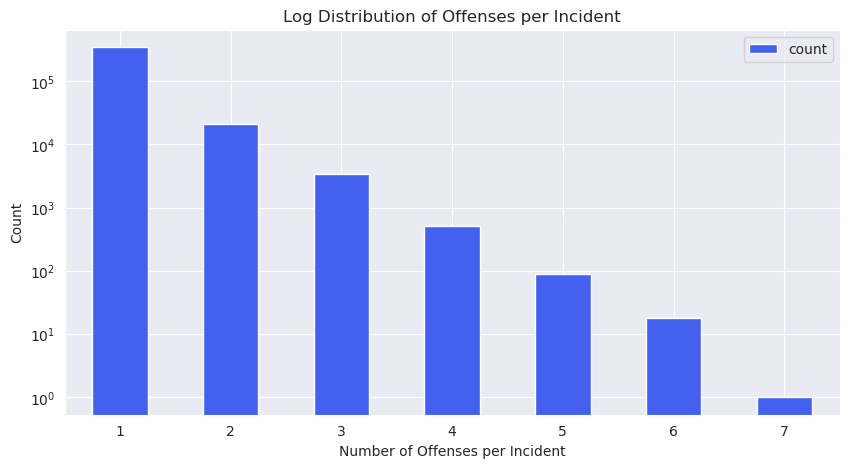

In [438]:
# explore the number of offenses per incident
offenses_per_incident = crime_weather_df['incident_id'].value_counts().reset_index()
offenses_per_incident.columns = ['incident_id', 'offenses_per_incident']

sns.set_style('darkgrid')
offenses_per_incident['offenses_per_incident'].value_counts().reset_index().plot(
    x='offenses_per_incident',y='count', kind='bar', figsize=(10, 5), color='#4361EE')
plt.title('Log Distribution of Offenses per Incident')
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Number of Offenses per Incident')
plt.xticks(rotation=0)
plt.show()

We can see that the majority of incidents involve only one criminal offense. However, in extreme cases, there were 
up to 7 criminal offenses committed per incident

### Offense Type ID

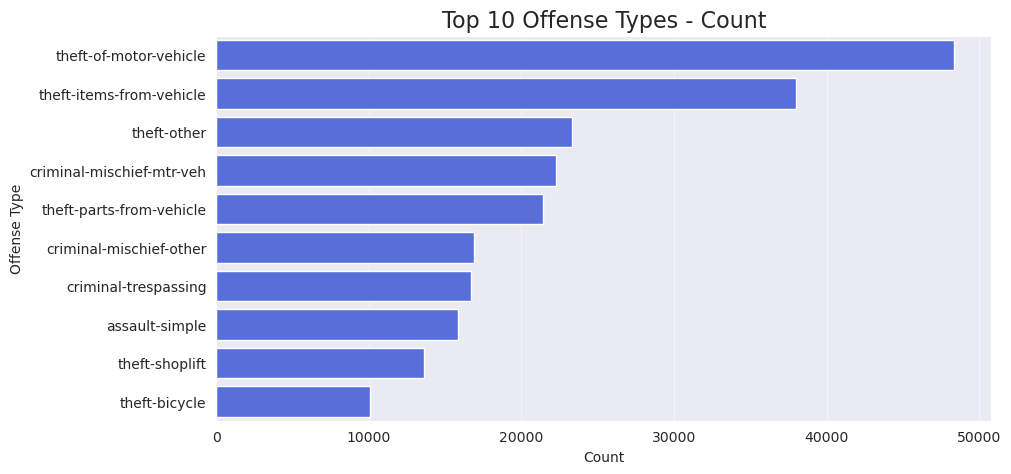

In [439]:
# value counts of top 10 offense types
top_10_offense_types = crime_weather_df['offense_type_id'].value_counts().sort_values(ascending=False).head(10).reset_index()
top_10_offense_types.columns = ['Offense Type', 'Count']

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(y='Offense Type', x='Count', data=top_10_offense_types, color='#4361EE')
plt.title('Top 10 Offense Types - Count', fontsize=16)
plt.grid(axis='x', alpha=0.5)
plt.show()

### Offense Category

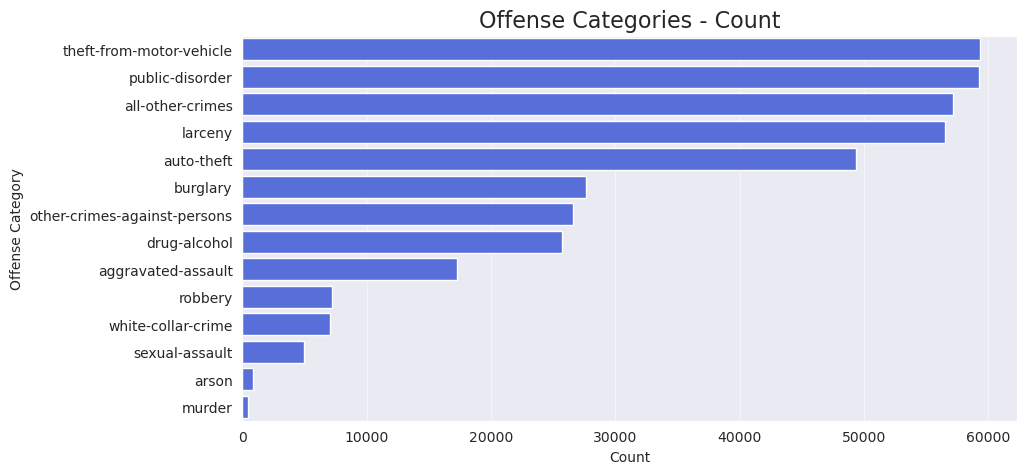

In [440]:
# crime count by offense category (bar plot)
offense_counts = crime_weather_df['offense_category_id'].value_counts().sort_values(ascending=False).reset_index()
offense_counts.columns = ['Offense Category','Count']

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(y='Offense Category', x='Count', data=offense_counts, color='#4361EE')
plt.title('Offense Categories - Count', fontsize=16)
plt.grid(axis='x', alpha=0.5)
plt.show()

### Victim Count

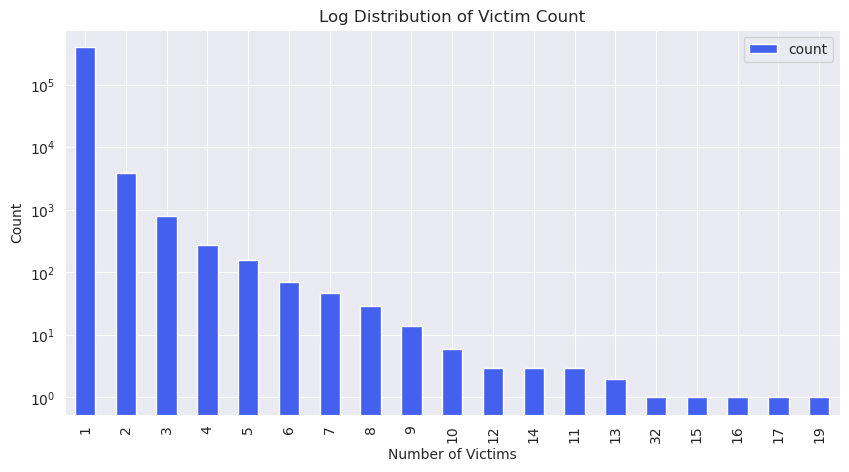

In [441]:
# explore distribution of victim count
sns.set_style('darkgrid')
crime_weather_df['victim_count'].value_counts().reset_index().plot(
    x='victim_count', y='count', kind='bar', figsize=(10, 5), color='#4361EE')
plt.title('Log Distribution of Victim Count')
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Number of Victims')
plt.show()

The vast majority of crimes involve one victim. However, extreme cases reach up to 19 victims

### Crime Frequency (by month)

Since every row in the dataset represents a criminal offense, exploring the frequency of dates is analagous to exploring the number of offenses in the dataset

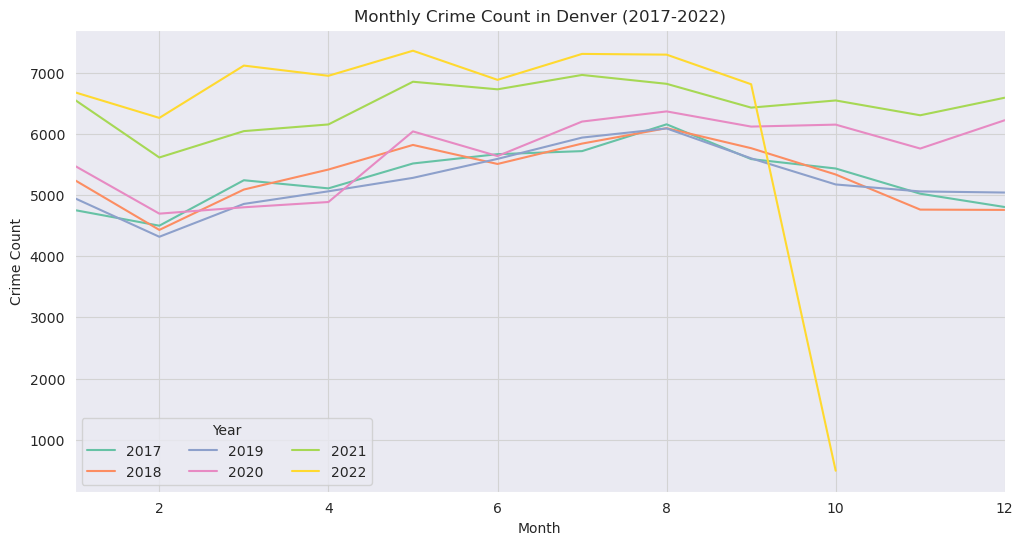

In [442]:
# we will group by month and year to aid in visual smoothing of the plot
crime_freq_df = crime_weather_df.groupby(['month', 'year'])['date'].count().reset_index()
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.lineplot(data=crime_freq_df, x='month', y='date', hue='year', palette='Set2')
plt.title('Monthly Crime Count in Denver (2017-2022)')
plt.grid(True, color='lightgray')
plt.ylabel('Crime Count')
plt.xlabel('Month')
plt.xlim(1,12)
plt.legend(title='Year',loc='lower left', ncols=3)
plt.show()

### Crime Frequency (by year)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


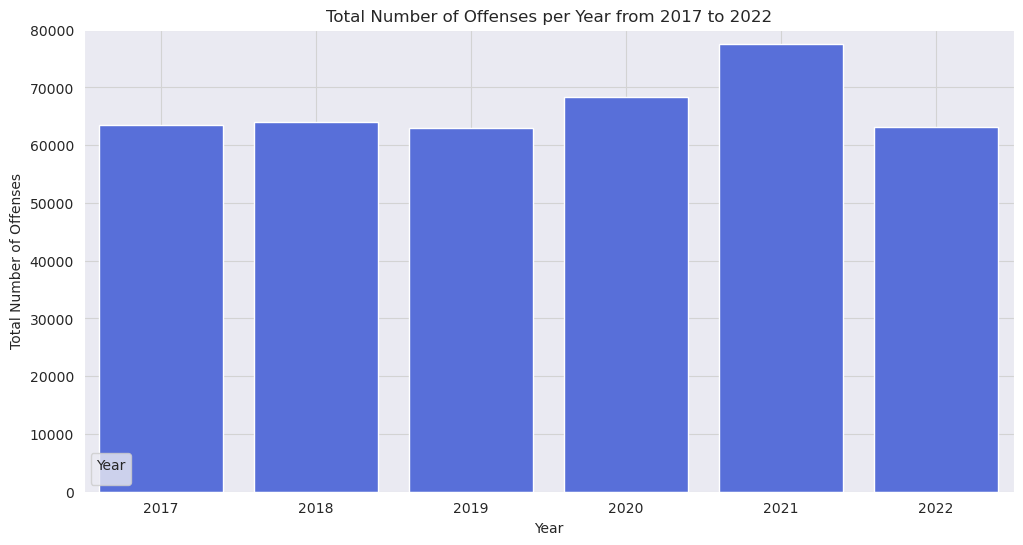

In [443]:
ann_crime_freq_df = crime_weather_df.groupby('year')['date'].count().reset_index()
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.barplot(data=ann_crime_freq_df, x='year', y='date', color='#4361EE')
plt.title('Total Number of Offenses per Year from 2017 to 2022')
plt.grid(True, color='lightgray')
plt.ylabel('Total Number of Offenses')
plt.xlabel('Year')
plt.ylim(0,80000)
plt.legend(title='Year',loc='lower left', ncols=3)
plt.show()

### Average Temperature

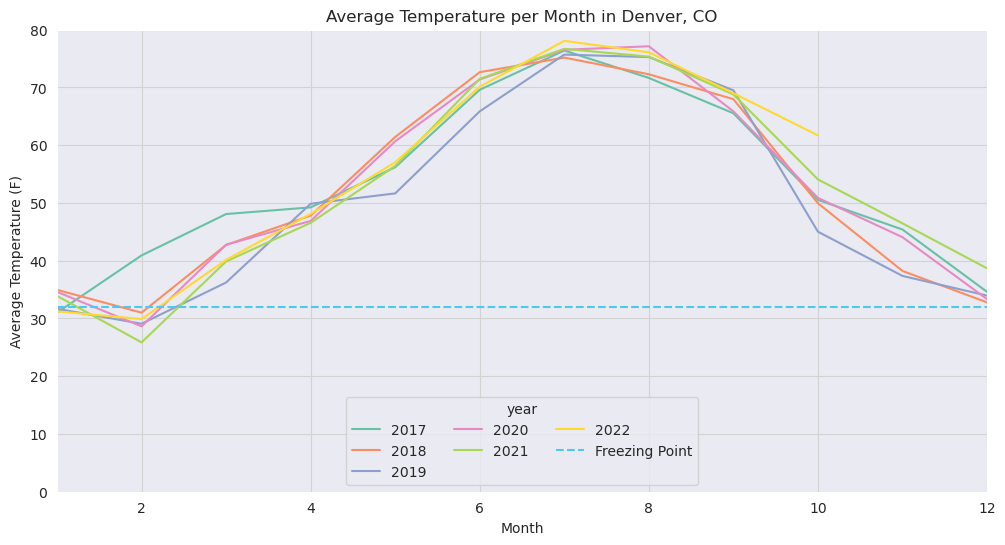

In [444]:
# month and year breakdown for smoother plotting
avgtemp_df = crime_weather_df.groupby(['year','month'])['avgtemp'].mean().reset_index()

# begin plotting
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.lineplot(data=avgtemp_df, x='month', y='avgtemp', hue='year', palette='Set2')
plt.title('Average Temperature per Month in Denver, CO')
plt.grid(True, color='lightgray')
plt.ylim(0,80)
plt.xlim(1,12)
plt.ylabel('Average Temperature (F)')
plt.xlabel('Month')
plt.axhline(y=32, color='#4CC9F0', linestyle='--', label='Freezing Point')
plt.legend(title='year',loc='lower center', ncols=3)
plt.show()
pass

We can see that monthly trends tend to be consistent over years. However, we can't see any granular outliers

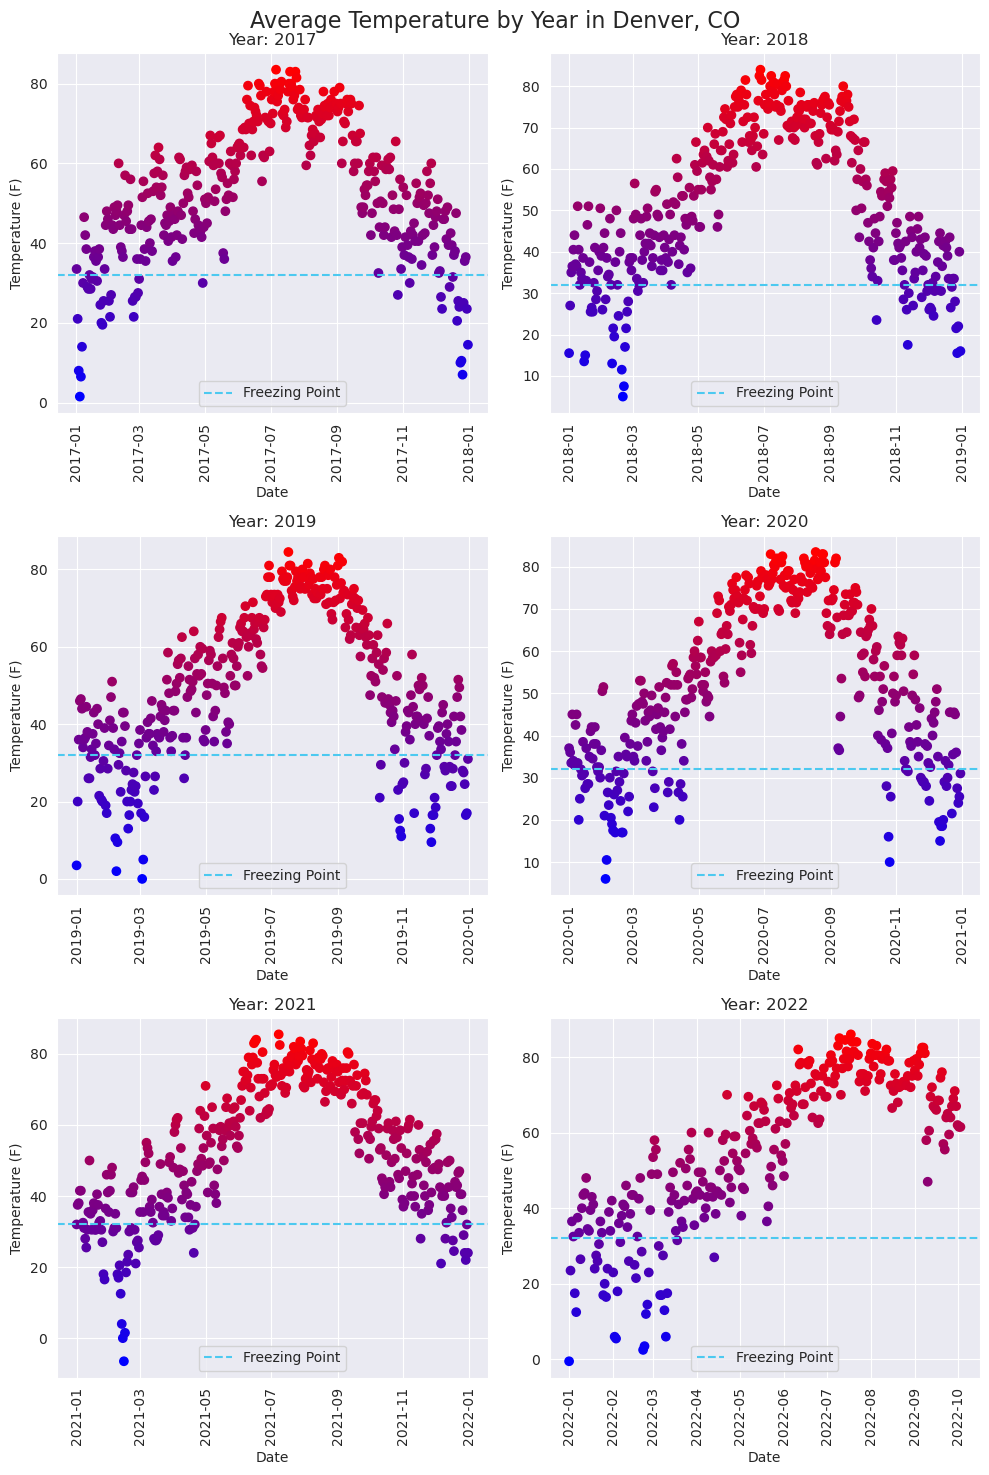

In [445]:
# closer inspection into average daily temperature per day - subplot breakdown by year
# create subset of data and collect unique years
avgtemp_individual_df = crime_weather_df.groupby('date')['avgtemp'].mean().reset_index()
years = avgtemp_individual_df['date'].dt.year.unique()

# color logic for cmap
colors = [(0, 'blue'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('CustomBlueRed', colors)

# begin plotting
fig, axes = plt.subplots(3,2, figsize=(10, 15))
fig.suptitle('Average Temperature by Year in Denver, CO', fontsize=16)

# logic for subplotting
for i, year in enumerate(years):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    year_data = avgtemp_individual_df[avgtemp_individual_df['date'].dt.year == year]
    ax.scatter(year_data['date'], year_data['avgtemp'], c=year_data['avgtemp'], cmap=cmap, alpha=1)
    ax.set_title(f'Year: {year}')
    ax.set_xlabel('Date')
    ax.tick_params(axis='x',rotation=90)
    ax.axhline(y=32, color='#4CC9F0', linestyle='--', label='Freezing Point')
    ax.set_ylabel('Temperature (F)')
    ax.legend(loc='lower center')
plt.tight_layout()
plt.show()

Not only does this granular breakdown show us potential outlier days, we can also see the general variation in temperature throughout each month. Most notably, we see that winter months can have a temperature range of nearly 60 degrees F per month. However, late summer months (July - Sept) have consistently low temperature variation

### Severity - Harm

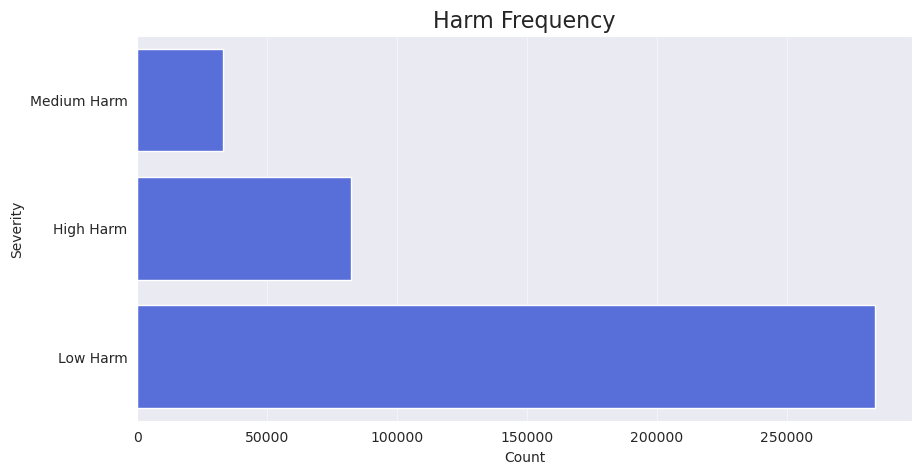

In [446]:
severity_counts = crime_weather_df['severity'].value_counts().reset_index().sort_values(by='count')

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(y='severity', x='count', data=severity_counts, color='#4361EE')
plt.title('Harm Frequency', fontsize=16)
plt.ylabel('Severity')
plt.xlabel('Count')
plt.grid(axis='x', alpha=0.5)
plt.show()

A large majority of crimes are in the low harm categor - this is to be expected. However, it's unexpected that high harm is the second most popular crime severity, with medium harm in last. This could be due to our categorization method or the criminal nature of Denver, CO

### Severity - Damage

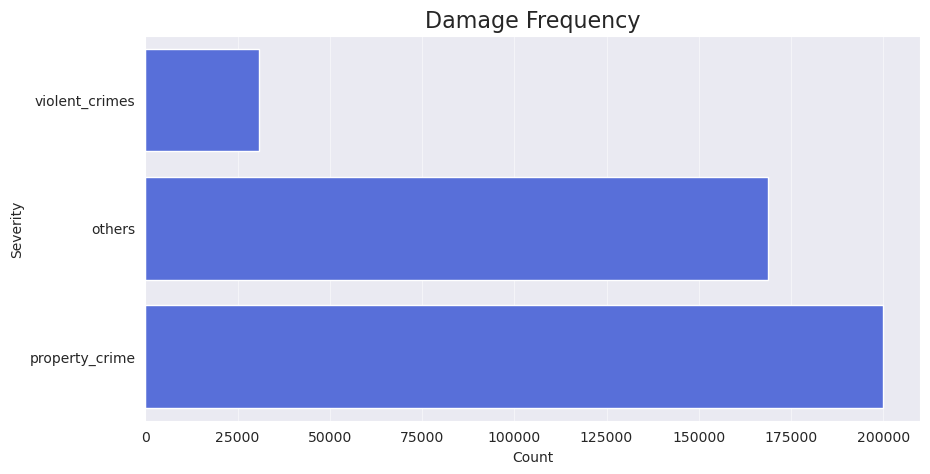

In [447]:
severity_counts = crime_weather_df['severity_dmg'].value_counts().reset_index().sort_values(by='count')

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(y='severity_dmg', x='count', data=severity_counts, color='#4361EE')
plt.title('Damage Frequency', fontsize=16)
plt.ylabel('Severity')
plt.xlabel('Count')
plt.grid(axis='x', alpha=0.5)
plt.show()

# Crime vs Temperature

### Monthly Average Incidents by Temperature


Correlation between number of incidents and average temperature: 0.79


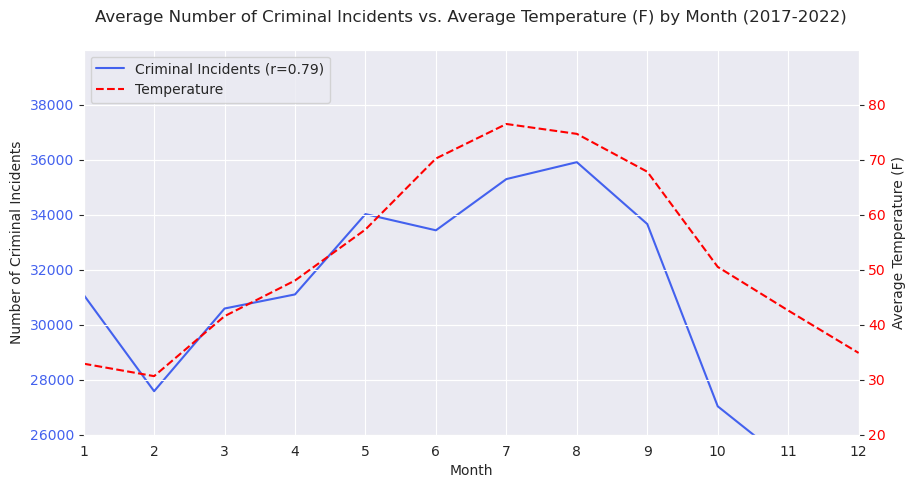

In [448]:
# Average number of incidents vs temp by month

# create subset
temp_df = crime_weather_df.groupby('month').agg({'incident_id':'nunique','avgtemp':'mean'}).reset_index()

cor_val = temp_df['incident_id'].corr(temp_df['avgtemp'])
print(f"Correlation between number of incidents and average temperature: {cor_val:.2f}")

# begin plotting
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))

ax1 = sns.lineplot(x='month', y='incident_id', data=temp_df, color='#4361EE', label=f'Criminal Incidents (r={cor_val:.2f})')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='month', y='avgtemp', data=temp_df, color='red', label='Temperature', linestyle='--')

ax1.set_ylabel('Number of Criminal Incidents')
ax2.set_ylabel('Average Temperature (F)')

ax1.set_xlabel('Month')

# remove individual legends
ax1.legend().remove()
ax2.legend().remove()

# create a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# title
plt.title("Average Number of Criminal Incidents vs. Average Temperature (F) by Month (2017-2022)", fontsize=12, pad=20)

# set y-tick params
ax1.set_yticks(ax1.get_yticks()[:8])
ax2.set_yticks(ax2.get_yticks()[:8])
ax1.set_ylim(26000,40000)
ax2.set_ylim(20,90)
ax1.tick_params(axis='y', labelcolor='#4361EE')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_xlim(1,12)
ax1.set_xticks(range(1,13))

plt.show()

Criminal incidents and temperature seem to follow a strong correlation from February to May. However, as the temp ramps up in the primary summer months, the correlation seems to weaken. Furthermore, the latter half of the year sees an increased separation between the two variables. In separating the data by month results in a criminal incident and temperature correlation of 0.79

### Monthly Average Offenses by Temperature


Correlation between number of offenses and average temperature: 0.78


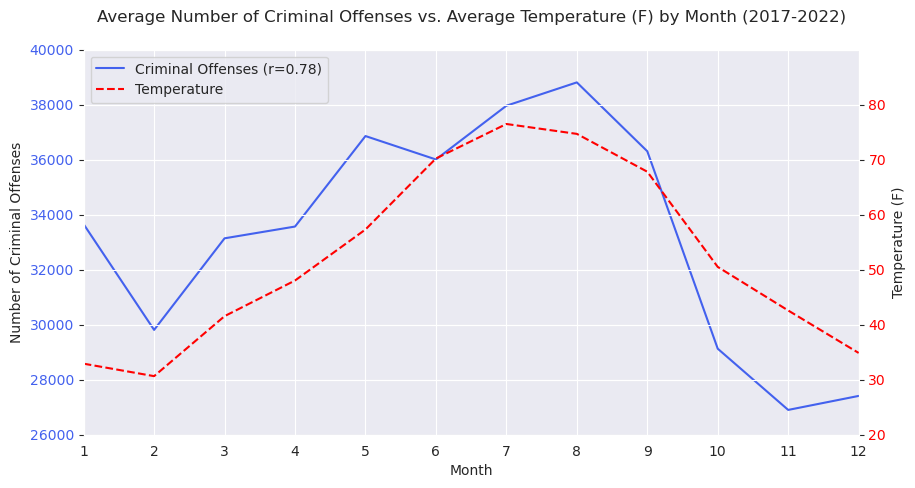

In [449]:
# Number of total offenses vs avg temp by month

# create subset
temp_df = crime_weather_df.groupby('month').agg({'offense_id':'nunique','avgtemp':'mean'}).reset_index()

cor_val = temp_df['offense_id'].corr(temp_df['avgtemp'])
print(f"Correlation between number of offenses and average temperature: {cor_val:.2f}")

# begin plotting
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))

ax1 = sns.lineplot(x='month', y='offense_id', data=temp_df, color='#4361EE', label=f'Criminal Offenses (r={cor_val:.2f})')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='month', y='avgtemp', data=temp_df, color='red', label='Temperature', linestyle='--')

ax1.set_ylabel('Number of Criminal Offenses')
ax2.set_ylabel('Temperature (F)')

ax1.set_xlabel('Month')

# remove individual legends
ax1.legend().remove()
ax2.legend().remove()

# create a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# title
plt.title("Average Number of Criminal Offenses vs. Average Temperature (F) by Month (2017-2022)", fontsize=12, pad=20)

# set y-tick params
ax1.set_yticks(ax1.get_yticks()[:8])
ax2.set_yticks(ax2.get_yticks()[:8])
ax1.set_ylim(26000,40000)
ax2.set_ylim(20,90)

ax1.tick_params(axis='y', labelcolor='#4361EE')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_xlim(1,12)
ax1.set_xticks(range(1,13))

plt.show()

### Monthly Average Number of Offenses per Incident by Temperature

Correlation between offenses per incidents and average temperature: -0.27


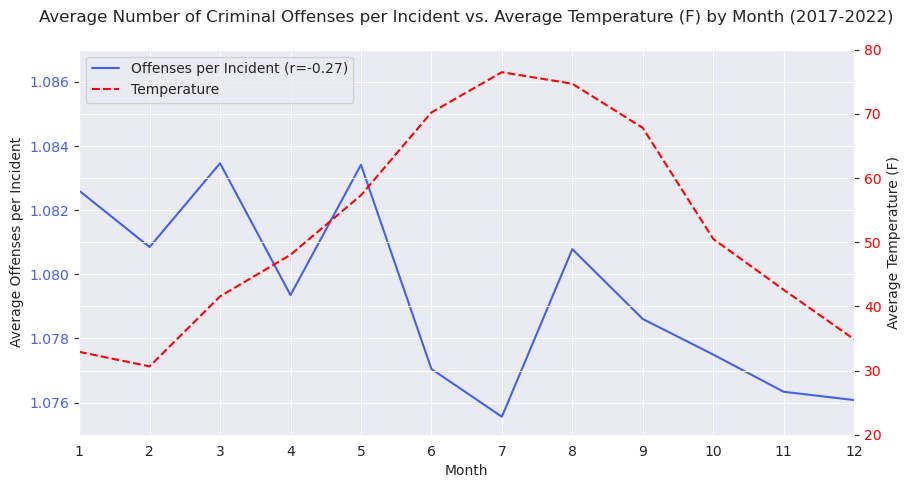

In [450]:
# average number of offenses per incident vs avg temp per month

# create subset
temp_df = crime_weather_df.groupby('month').agg({'offense_id':'nunique', 'incident_id':'nunique','avgtemp':'mean'}).reset_index()
temp_df['offenses_per_incident'] = temp_df['offense_id'] / temp_df['incident_id']

cor_val = temp_df['offenses_per_incident'].corr(temp_df['avgtemp'])
print(f"Correlation between offenses per incidents and average temperature: {cor_val:.2f}")

# begin plotting
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))

ax1 = sns.lineplot(x='month', y='offenses_per_incident', data=temp_df, color='#4361EE', label=f'Offenses per Incident (r={cor_val:.2f})')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='month', y='avgtemp', data=temp_df, color='red', label='Temperature', linestyle='--')

ax1.set_ylabel('Average Offenses per Incident')
ax2.set_ylabel('Average Temperature (F)')

ax1.set_xlabel('Month')

# remove individual legends
ax1.legend().remove()
ax2.legend().remove()

# create a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# title
plt.title("Average Number of Criminal Offenses per Incident vs. Average Temperature (F) by Month (2017-2022)", fontsize=12, pad=20)

# set y-tick params
ax2.set_yticks(ax2.get_yticks()[:7])
ax1.set_ylim(1.075, 1.087)
ax1.tick_params(axis='y', labelcolor='#4361EE')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_xlim(1,12)
ax1.set_xticks(range(1,13))

plt.show()

By taking the y-axis range into account, we can see that there is little variation in the number of offenses per incident throughout the year. On a monthly breakdown, offenses per incident and temperature yield a correlation of -0.27 indicating a lack of relationship.

# Severity vs Temperature

### Damage by Temperature - Bar Chart

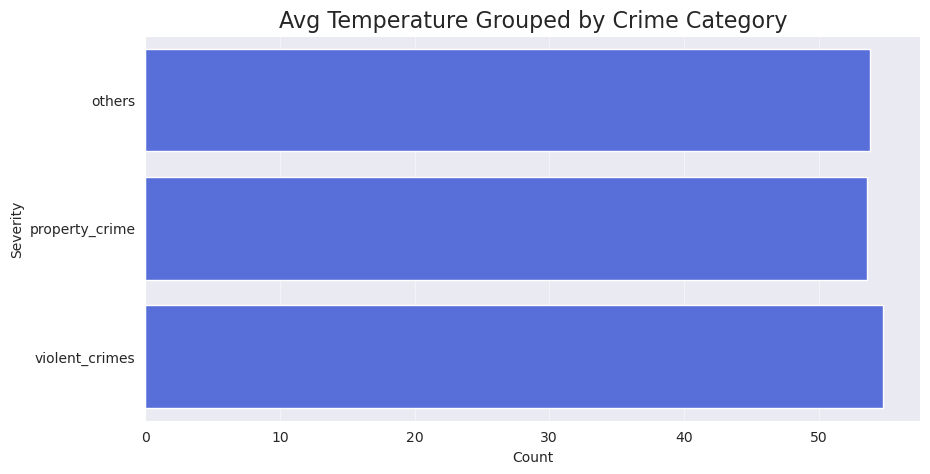

In [451]:
crime_severity_grouped = crime_weather_df.groupby('severity_dmg').avgtemp.mean().reset_index()

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(y='severity_dmg', x='avgtemp', data=crime_severity_grouped, color='#4361EE')
plt.title('Avg Temperature Grouped by Crime Category', fontsize=16)
plt.ylabel('Severity')
plt.xlabel('Count')
plt.grid(axis='x', alpha=0.5)
plt.show()

In [452]:
crime_severity_grouped

,severity_dmg,avgtemp
0,others,53.80
1,property_crime,53.62
2,violent_crimes,54.81


### Harm by Temperature - Line Chart

Correlation between High Harm and Average Temperature: 0.86
Correlation between Medium Harm and Average Temperature: 0.80
Correlation between Low Harm and Average Temperature: 0.75


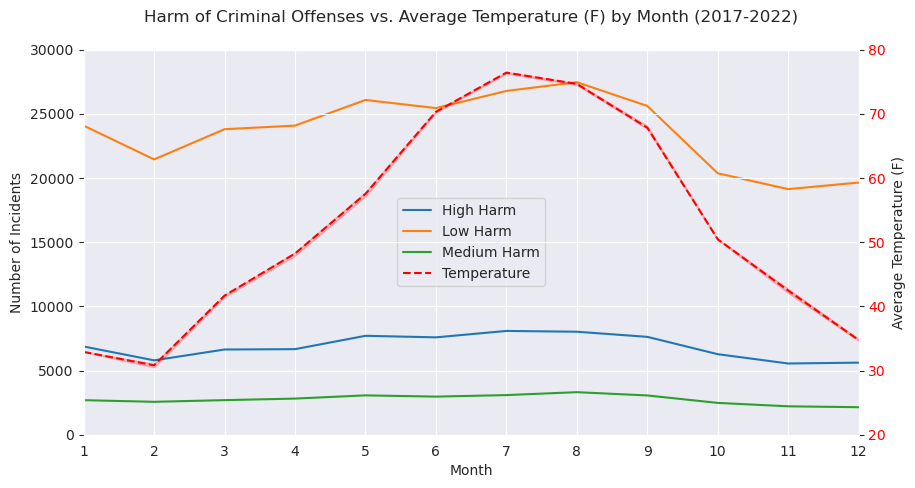

In [453]:
# correlations
temp_df_high = crime_weather_df[crime_weather_df['severity']=='High Harm']
temp_df_high = temp_df_high.groupby('month').agg({'offense_type_id':'count','avgtemp':'mean'}).reset_index()
high_corr = temp_df_high['offense_type_id'].corr(temp_df_high['avgtemp'])

temp_df_medium = crime_weather_df[crime_weather_df['severity']=='Medium Harm']
temp_df_medium = temp_df_medium.groupby('month').agg({'offense_type_id':'count','avgtemp':'mean'}).reset_index()
medium_corr = temp_df_medium['offense_type_id'].corr(temp_df_high['avgtemp'])

temp_df_low = crime_weather_df[crime_weather_df['severity']=='Low Harm']
temp_df_low = temp_df_low.groupby('month').agg({'offense_type_id':'count','avgtemp':'mean'}).reset_index()
low_corr = temp_df_low['offense_type_id'].corr(temp_df_high['avgtemp'])

print(f'Correlation between High Harm and Average Temperature: {high_corr:.2f}')
print(f'Correlation between Medium Harm and Average Temperature: {medium_corr:.2f}')
print(f'Correlation between Low Harm and Average Temperature: {low_corr:.2f}')

# groupby for plotting
temp_df = crime_weather_df.groupby(['month','severity']).agg({'offense_type_id':'count','avgtemp':'mean'}).reset_index()
temp_df.rename(columns={'offense_type_id':'count'},inplace=True)

# begin plotting
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))

ax1 = sns.lineplot(x='month', y='count', hue='severity', data=temp_df)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='month', y='avgtemp', data=temp_df, color='red', label='Temperature', linestyle='--')

ax1.set_ylabel('Number of Incidents')
ax2.set_ylabel('Average Temperature (F)')

ax1.set_xlabel('Month')

# remove individual legends
ax1.legend().remove()
ax2.legend().remove()

# create a combined legend
handles, labels = ax1.get_legend_handles_labels()
temp_handle = mlines.Line2D([], [], color='red', label='Temperature', linestyle='--')
handles.append(temp_handle)
labels.append('Temperature')
ax1.legend(handles, labels, loc='center')

# title
plt.title("Harm of Criminal Offenses vs. Average Temperature (F) by Month (2017-2022)", fontsize=12, pad=20)

# set y-tick params
ax1.set_yticks(ax1.get_yticks()[:8])
ax2.set_yticks(ax2.get_yticks()[:8])
ax1.tick_params(axis='y')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_xlim(1,12)
ax1.set_xticks(range(1,13))

plt.show()

From the line graph, we can see slight increases in offenses for each severity during the summer months. While the lines don't look to follow similar patterns, this is due to a difference in scale. Correlation values indicate that each of the severity levels are positively correlated with temperature. This means that we observe an increase in all types of crime severity as temperature increases

Correlation between High Harm and Average Temperature: 0.86
Correlation between Medium Harm and Average Temperature: 0.80
Correlation between Low Harm and Average Temperature: 0.75


<Figure size 1000x500 with 0 Axes>

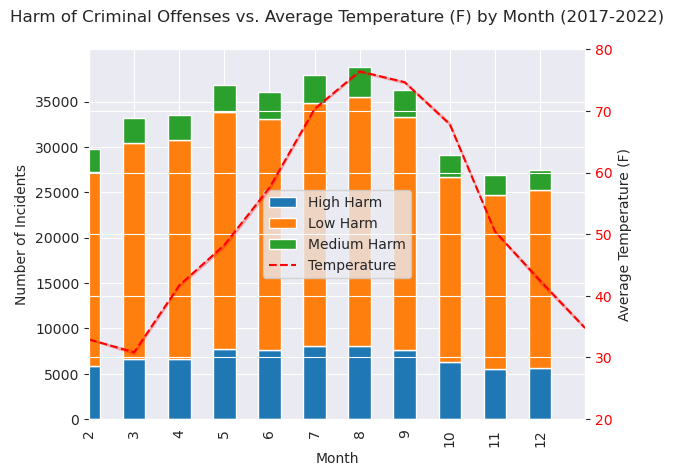

In [454]:
# correlations
temp_df_high = crime_weather_df[crime_weather_df['severity']=='High Harm']
temp_df_high = temp_df_high.groupby('month').agg({'offense_type_id':'count','avgtemp':'mean'}).reset_index()
high_corr = temp_df_high['offense_type_id'].corr(temp_df_high['avgtemp'])

temp_df_medium = crime_weather_df[crime_weather_df['severity']=='Medium Harm']
temp_df_medium = temp_df_medium.groupby('month').agg({'offense_type_id':'count','avgtemp':'mean'}).reset_index()
medium_corr = temp_df_medium['offense_type_id'].corr(temp_df_high['avgtemp'])

temp_df_low = crime_weather_df[crime_weather_df['severity']=='Low Harm']
temp_df_low = temp_df_low.groupby('month').agg({'offense_type_id':'count','avgtemp':'mean'}).reset_index()
low_corr = temp_df_low['offense_type_id'].corr(temp_df_high['avgtemp'])

print(f'Correlation between High Harm and Average Temperature: {high_corr:.2f}')
print(f'Correlation between Medium Harm and Average Temperature: {medium_corr:.2f}')
print(f'Correlation between Low Harm and Average Temperature: {low_corr:.2f}')

# groupby for plotting
temp_df = crime_weather_df.groupby(['month','severity']).agg({'offense_type_id':'count','avgtemp':'mean'}).reset_index()
temp_df.rename(columns={'offense_type_id':'count'},inplace=True)
pivot_temp_df = temp_df.pivot_table(index='month',columns='severity',values='count', aggfunc='sum')

# begin plotting
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))

ax1 = pivot_temp_df.plot(kind='bar', stacked=True)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='month', y='avgtemp', data=temp_df, color='red', label='Temperature', linestyle='--')

ax1.set_ylabel('Number of Incidents')
ax2.set_ylabel('Average Temperature (F)')

ax1.set_xlabel('Month')

# remove individual legends
ax1.legend().remove()
ax2.legend().remove()

# create a combined legend
handles, labels = ax1.get_legend_handles_labels()
temp_handle = mlines.Line2D([], [], color='red', label='Temperature', linestyle='--')
handles.append(temp_handle)
labels.append('Temperature')
ax1.legend(handles, labels, loc='center')

# title
plt.title("Harm of Criminal Offenses vs. Average Temperature (F) by Month (2017-2022)", fontsize=12, pad=20)

# set y-tick params
ax1.set_yticks(ax1.get_yticks()[:8])
ax2.set_yticks(ax2.get_yticks()[:8])
ax1.tick_params(axis='y')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_xlim(1,12)
ax1.set_xticks(range(1,13))

plt.show()

The stacked bar chart helps investigate the total number of offenses per month with a severity breakdown. From this chart, we can see begin to see how crime frequency oscillates similar to temperature yielding the strong correlation values

# Specific Offenses to be Aware of

So we know that crime, as a whole, has a strong positive correlation with temperature. Let's dive one step deeper and investigate which offenses are most correlated with temperature. This will help inform the public of specific types of offenses to be aware throughout the year

In [455]:
high_df = crime_weather_df[crime_weather_df['severity'] == 'High Harm']
medium_df = crime_weather_df[crime_weather_df['severity'] == 'Medium Harm']
low_df = crime_weather_df[crime_weather_df['severity'] == 'Low Harm']
harm_dfs = [high_df, medium_df, low_df]

In [456]:
out_list = []
for harm_df in harm_dfs:
    top_10_offenses = harm_df['offense_type_id'].value_counts().index[:10]
    temp_out_list = []
    for offense in top_10_offenses:
        temp_df = harm_df[harm_df['offense_type_id']==offense]
        temp_df = temp_df.groupby('month').agg({'offense_category_id':'count','avgtemp':'mean'})
        corr_val = temp_df['offense_category_id'].corr(temp_df['avgtemp'])
        temp_out_list.append([corr_val, offense])
    out_list.append(sorted(temp_out_list, reverse=True))

harm_corr_list = [
    {
        'group':'High Harm',
        'correlations':out_list[0]
    },
    {
        'group':'Medium Harm',
        'correlations':out_list[1]
    },
    {
        'group':'Low Harm',
        'correlations':out_list[2]
    }
]
    
table = []
for group_data in harm_corr_list:
    group_name = group_data['group']
    for correlation in group_data['correlations']:
        correlation.append(group_name)
        table.append(correlation)

table_headers = ['Correlation', 'Offense', 'Severity']

print(tabulate(table, headers=table_headers, tablefmt='fancy_grid'))

╒═══════════════╤═══════════════════════════════╤═════════════╕
│   Correlation │ Offense                       │ Severity    │
╞═══════════════╪═══════════════════════════════╪═════════════╡
│     0.951187  │ aggravated-assault            │ High Harm   │
├───────────────┼───────────────────────────────┼─────────────┤
│     0.931985  │ menacing-felony-w-weap        │ High Harm   │
├───────────────┼───────────────────────────────┼─────────────┤
│     0.930929  │ robbery-street                │ High Harm   │
├───────────────┼───────────────────────────────┼─────────────┤
│     0.91178   │ assault-simple                │ High Harm   │
├───────────────┼───────────────────────────────┼─────────────┤
│     0.890848  │ aggravated-assault-dv         │ High Harm   │
├───────────────┼───────────────────────────────┼─────────────┤
│     0.816543  │ weapon-unlawful-discharge-of  │ High Harm   │
├───────────────┼───────────────────────────────┼─────────────┤
│     0.686798  │ assault-dv            

From this output, we can see that the highest correlated High Harm crime is aggravated assault with a 0.95 correlation to temperature. For Medium Harm, residential burglary without force has a 0.97 correlation to temperature. Finally, for Low Harm, bicycle theft has a 0.98 correlation to temperature.

Another interesting takeaway from this graph are the offenses with a near-zero correlation value such as engaging in prostitution, shoplifting, and criminal trespassing. These offenses must be apparent throughout the year